<a href="https://colab.research.google.com/github/codeofarmour/data_analysis_for_fictional_company/blob/master/Fictional_Company_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis of Fictional Company Employee Engagement Survey
This analysis covers levels of employee engagement and overall job satisfaction.
* The information contained in the 'data' list of dictionaries represents the results of an imaginary set of survey questions administered to the employees of Fictional Company, LLC.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set general plot theme
plt.style.use('seaborn')

In [3]:
# Initialize data from a list of Python dictionaries
"""Not the ideal method. This project is for demonstration purposes only."""

data = [{'job': 'DPQE', 'proud': 'A', 'rec':'D', 'stay': 'A', 'info': 'D', 'rm':'D', 'sugg': 'D', 'prob': 'A', 'fair':'D', 'vision': 'D', 'tools': 'A', 'learn':'A', 'train': 'D', 'support': 'A', 'recog':'D', 'safe': 'A', 'dev': 'D'},
        {'job': 'NA', 'proud': 'D', 'rec':'D', 'stay': 'SD', 'info': 'D', 'rm':'N', 'sugg': 'N', 'prob': 'N', 'fair':'A', 'vision': 'SD', 'tools': 'D', 'learn':'N', 'train': 'N', 'support': 'SD', 'recog':'D', 'safe': 'D', 'dev': 'D'},
        {'job': 'FHC', 'proud': 'A', 'rec':'D', 'stay': 'A', 'info': 'D', 'rm':'SA', 'sugg': 'A', 'prob': 'A', 'fair':'SA', 'vision': 'N', 'tools': 'D', 'learn':'A', 'train': 'D', 'support': 'SD', 'recog':'SA', 'safe': 'SD', 'dev': 'A'},
        {'job': 'DPQE', 'proud': 'N', 'rec':'D', 'stay': 'D', 'info': 'SD', 'rm':'A', 'sugg': 'A', 'prob': 'A', 'fair':'A', 'vision': 'D', 'tools': 'D', 'learn':'N', 'train': 'N', 'support': 'D', 'recog':'D', 'safe': 'D', 'dev': 'A'},
        {'job': 'FHC', 'proud': 'A', 'rec':'N', 'stay': 'N', 'info': 'D', 'rm':'SA', 'sugg': 'A', 'prob': 'SA', 'fair':'A', 'vision': 'D', 'tools': 'D', 'learn':'N', 'train': 'D', 'support': 'D', 'recog':'N', 'safe': 'N', 'dev': 'A'},
        {'job': 'SCS', 'proud': 'A', 'rec':'A', 'stay': 'A', 'info': 'D', 'rm':'A', 'sugg': 'A', 'prob': 'A', 'fair':'A', 'vision': 'D', 'tools': 'N', 'learn':'D', 'train': 'N', 'support': 'D', 'recog':'A', 'safe': 'N', 'dev': 'A'},
        {'job': 'NA', 'proud': 'A', 'rec':'N', 'stay': 'N', 'info': 'N', 'rm':'N', 'sugg': 'N', 'prob': 'N', 'fair':'A', 'vision': 'A', 'tools': 'A', 'learn':'N', 'train': 'A', 'support': 'A', 'recog':'A', 'safe': 'N', 'dev': 'A'},
        {'job': 'DPQE', 'proud': 'N', 'rec':'N', 'stay': 'A', 'info': 'D', 'rm':'A', 'sugg': 'SA', 'prob': 'SA', 'fair':'SA', 'vision': 'SA', 'tools': 'A', 'learn':'A', 'train': 'N', 'support': 'D', 'recog':'A', 'safe': 'N', 'dev': 'A'},
        {'job': 'NA', 'proud': 'SA', 'rec':'N', 'stay': 'N', 'info': 'SD', 'rm':'N', 'sugg': 'N', 'prob': 'N', 'fair':'N', 'vision': 'D', 'tools': 'A', 'learn':'A', 'train': 'N', 'support': 'A', 'recog':'A', 'safe': 'N', 'dev': 'N'},
        {'job': 'NA', 'proud': 'A', 'rec':'N', 'stay': 'A', 'info': 'A', 'rm':'A', 'sugg': 'A', 'prob': 'A', 'fair':'A', 'vision': 'A', 'tools': 'N', 'learn':'N', 'train': 'N', 'support': 'N', 'recog':'N', 'safe': 'A', 'dev': 'A'},
        {'job': 'NA', 'proud': 'A', 'rec':'N', 'stay': 'A', 'info': 'N', 'rm':'A', 'sugg': 'SA', 'prob': 'SA', 'fair':'SA', 'vision': 'N', 'tools': 'SA', 'learn':'SA', 'train': 'SA', 'support': 'A', 'recog':'A', 'safe': 'A', 'dev': 'N'},
        {'job': 'NA', 'proud': 'A', 'rec':'SD', 'stay': 'SD', 'info': 'SD', 'rm':'N', 'sugg': 'SD', 'prob': 'SD', 'fair':'N', 'vision': 'SD', 'tools': 'SD', 'learn':'SD', 'train': 'SD', 'support': 'D', 'recog':'N', 'safe': 'D', 'dev': 'SD'},
        {'job': 'DPQE', 'proud': 'A', 'rec':'A', 'stay': 'A', 'info': 'D', 'rm':'A', 'sugg': 'D', 'prob': 'D', 'fair':'A', 'vision': 'SD', 'tools': 'A', 'learn':'N', 'train': 'A', 'support': 'A', 'recog':'A', 'safe': 'A', 'dev': 'A'},
        {'job': 'SCS', 'proud': 'N', 'rec':'N', 'stay': 'A', 'info': 'A', 'rm':'D', 'sugg': 'D', 'prob': 'SD', 'fair':'SD', 'vision': 'A', 'tools': 'A', 'learn':'D', 'train': 'D', 'support': 'SD', 'recog':'A', 'safe': 'D', 'dev': 'A'},
        {'job': 'DPQE', 'proud': 'N', 'rec':'N', 'stay': 'A', 'info': 'A', 'rm':'SA', 'sugg': 'SA', 'prob': 'SA', 'fair':'SA', 'vision': 'A', 'tools': 'A', 'learn':'D', 'train': 'D', 'support': 'SD', 'recog':'A', 'safe': 'D', 'dev': 'A'},
        {'job': 'DPQE', 'proud': 'A', 'rec':'N', 'stay': 'N', 'info': 'N', 'rm':'A', 'sugg': 'A', 'prob': 'A', 'fair':'A', 'vision': 'N', 'tools': 'A', 'learn':'A', 'train': 'D', 'support': 'SD', 'recog':'N', 'safe': 'N', 'dev': 'A'},
        {'job': 'DPQE', 'proud': 'SA', 'rec':'A', 'stay': 'SA', 'info': 'A', 'rm':'A', 'sugg': 'SA', 'prob': 'SA', 'fair':'A', 'vision': 'A', 'tools': 'SA', 'learn':'A', 'train': 'D', 'support': 'D', 'recog':'N', 'safe': 'A', 'dev': 'A'}]
 
# Create and store the DataFrame in Pandas.
df = pd.DataFrame(data)

In [4]:
# Print out the new DataFrame
df

,job,proud,rec,stay,info,rm,sugg,prob,fair,vision,tools,learn,train,support,recog,safe,dev
0,DPQE,A,D,A,D,D,D,A,D,D,A,A,D,A,D,A,D
1,NA,D,D,SD,D,N,N,N,A,SD,D,N,N,SD,D,D,D
2,FHC,A,D,A,D,SA,A,A,SA,N,D,A,D,SD,SA,SD,A
3,DPQE,N,D,D,SD,A,A,A,A,D,D,N,N,D,D,D,A
4,FHC,A,N,N,D,SA,A,SA,A,D,D,N,D,D,N,N,A
5,SCS,A,A,A,D,A,A,A,A,D,N,D,N,D,A,N,A
6,NA,A,N,N,N,N,N,N,A,A,A,N,A,A,A,N,A
7,DPQE,N,N,A,D,A,SA,SA,SA,SA,A,A,N,D,A,N,A
8,NA,SA,N,N,SD,N,N,N,N,D,A,A,N,A,A,N,N
9,NA,A,N,A,A,A,A,A,A,A,N,N,N,N,N,A,A


In [9]:
# Print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   job      17 non-null     object
 1   proud    17 non-null     object
 2   rec      17 non-null     object
 3   stay     17 non-null     object
 4   info     17 non-null     object
 5   rm       17 non-null     object
 6   sugg     17 non-null     object
 7   prob     17 non-null     object
 8   fair     17 non-null     object
 9   vision   17 non-null     object
 10  tools    17 non-null     object
 11  learn    17 non-null     object
 12  train    17 non-null     object
 13  support  17 non-null     object
 14  recog    17 non-null     object
 15  safe     17 non-null     object
 16  dev      17 non-null     object
dtypes: object(17)
memory usage: 2.4+ KB


In [8]:
# Check for missing values
df.isna()

,job,proud,rec,stay,info,rm,sugg,prob,fair,vision,tools,learn,train,support,recog,safe,dev
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


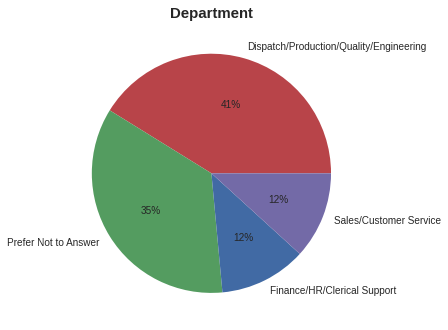

In [10]:
# Visualize the employee responses via a series of pie charts, each chart representing employee responses to a particular question
dept = df.loc[df['job'] == 'DPQE'].count()[0]
na = df.loc[df['job'] == 'NA'].count()[0]
fhc = df.loc[df['job'] == 'FHC'].count()[0]
scs = df.loc[df['job'] == 'SCS'].count()[0]

labels = ['Dispatch/Production/Quality/Engineering', 'Prefer Not to Answer', 'Finance/HR/Clerical Support', 'Sales/Customer Service']
colors = ['#b84449', '#549c60', '#416aa4', '#736aa7']

plt.pie([dept, na, fhc, scs], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('Department', size=15, fontweight='bold')

"""This is how I would save the chart if this project were for a client"""
# plt.savefig('department.png', dpi=300)

plt.show()

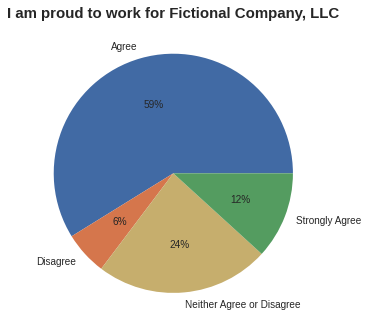

In [11]:
a = df.loc[df['proud'] == 'A'].count()[0]
d = df.loc[df['proud'] == 'D'].count()[0]
n = df.loc[df['proud'] == 'N'].count()[0]
sa = df.loc[df['proud'] == 'SA'].count()[0]

labels = ['Agree', 'Disagree', 'Neither Agree or Disagree', 'Strongly Agree']
colors = ['#416aa4', '#d5764c', '#c6ae6d', '#549c60']

plt.pie([a, d, n, sa], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('I am proud to work for Fictional Company, LLC', size=15, fontweight='bold')

plt.show()

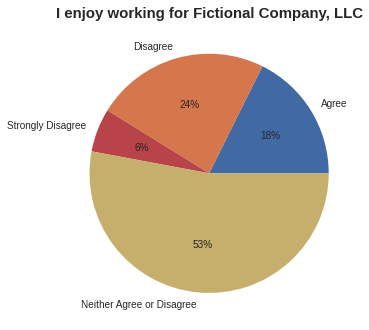

In [12]:
a = df.loc[df['rec'] == 'A'].count()[0]
d = df.loc[df['rec'] == 'D'].count()[0]
sd = df.loc[df['rec'] == 'SD'].count()[0]
n = df.loc[df['rec'] == 'N'].count()[0]


labels = ['Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('I enjoy working for Fictional Company, LLC', size=15, fontweight='bold')

plt.show()

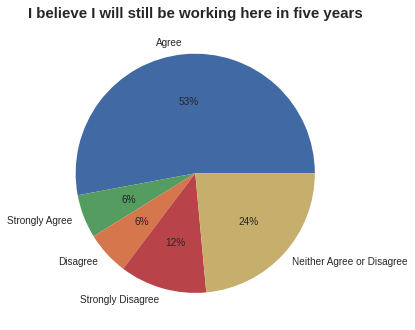

In [13]:
a = df.loc[df['stay'] == 'A'].count()[0]
sa = df.loc[df['stay'] == 'SA'].count()[0]
d = df.loc[df['stay'] == 'D'].count()[0]
sd = df.loc[df['stay'] == 'SD'].count()[0]
n = df.loc[df['stay'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, sa, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('I believe I will still be working here in five years', size=15, fontweight='bold')

plt.show()

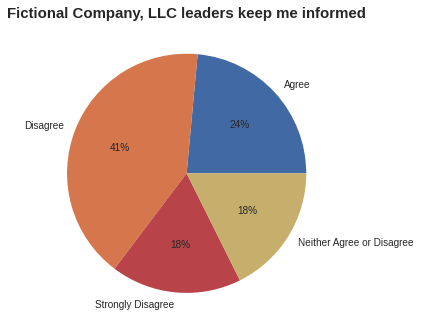

In [14]:
a = df.loc[df['info'] == 'A'].count()[0]
d = df.loc[df['info'] == 'D'].count()[0]
sd = df.loc[df['info'] == 'SD'].count()[0]
n = df.loc[df['info'] == 'N'].count()[0]


labels = ['Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('Fictional Company, LLC leaders keep me informed', size=15, fontweight='bold')

plt.show()

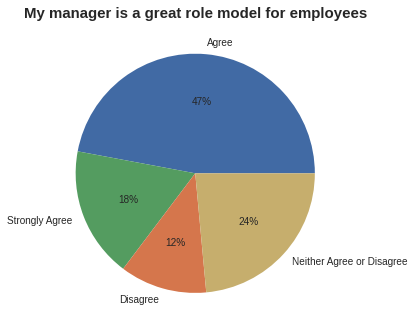

In [15]:
a = df.loc[df['rm'] == 'A'].count()[0]
sa = df.loc[df['rm'] == 'SA'].count()[0]
d = df.loc[df['rm'] == 'D'].count()[0]
n = df.loc[df['rm'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#c6ae6d']

plt.pie([a, sa, d, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('My manager is a great role model for employees', size=15, fontweight='bold')

plt.show()

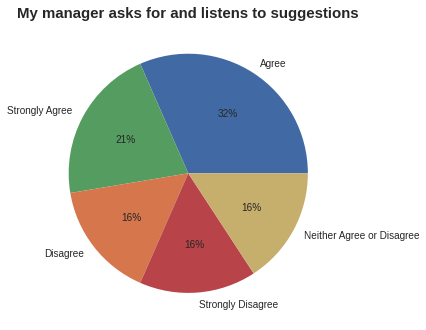

In [16]:
a = df.loc[df['sugg'] == 'A'].count()[0]
sa = df.loc[df['sugg'] == 'SA'].count()[0]
d = df.loc[df['sugg'] == 'D'].count()[0]
sd = df.loc[df['sugg'] == 'D'].count()[0]
n = df.loc[df['sugg'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, sa, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('My manager asks for and listens to suggestions', size=15, fontweight='bold')

plt.show()

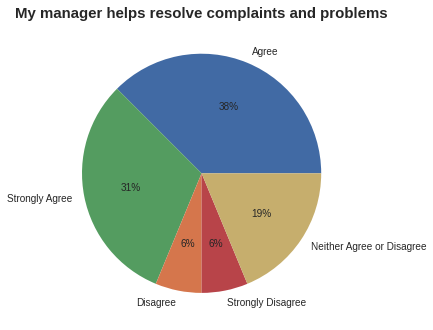

In [17]:
a = df.loc[df['prob'] == 'A'].count()[0]
sa = df.loc[df['prob'] == 'SA'].count()[0]
d = df.loc[df['prob'] == 'D'].count()[0]
sd = df.loc[df['prob'] == 'D'].count()[0]
n = df.loc[df['prob'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, sa, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('My manager helps resolve complaints and problems', size=15, fontweight='bold')

plt.show()

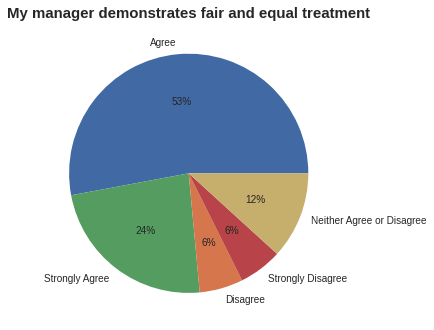

In [18]:
a = df.loc[df['fair'] == 'A'].count()[0]
sa = df.loc[df['fair'] == 'SA'].count()[0]
d = df.loc[df['fair'] == 'D'].count()[0]
sd = df.loc[df['fair'] == 'D'].count()[0]
n = df.loc[df['fair'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, sa, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('My manager demonstrates fair and equal treatment', size=15, fontweight='bold')

plt.show()

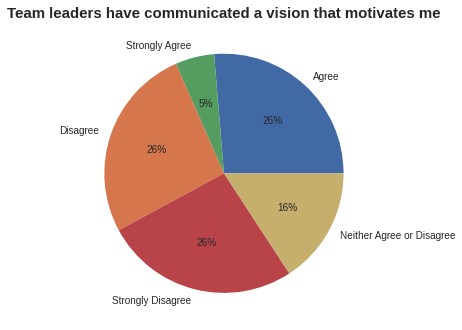

In [19]:
a = df.loc[df['vision'] == 'A'].count()[0]
sa = df.loc[df['vision'] == 'SA'].count()[0]
d = df.loc[df['vision'] == 'D'].count()[0]
sd = df.loc[df['vision'] == 'D'].count()[0]
n = df.loc[df['vision'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, sa, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('Team leaders have communicated a vision that motivates me', size=15, fontweight='bold')

plt.show()

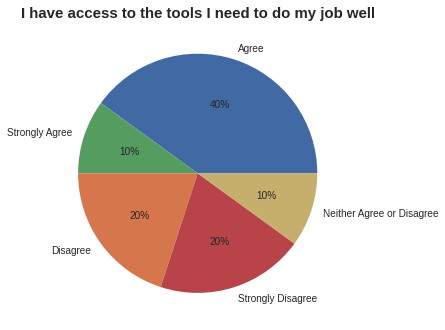

In [20]:
a = df.loc[df['tools'] == 'A'].count()[0]
sa = df.loc[df['tools'] == 'SA'].count()[0]
d = df.loc[df['tools'] == 'D'].count()[0]
sd = df.loc[df['tools'] == 'D'].count()[0]
n = df.loc[df['tools'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, sa, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('I have access to the tools I need to do my job well', size=15, fontweight='bold')

plt.show()

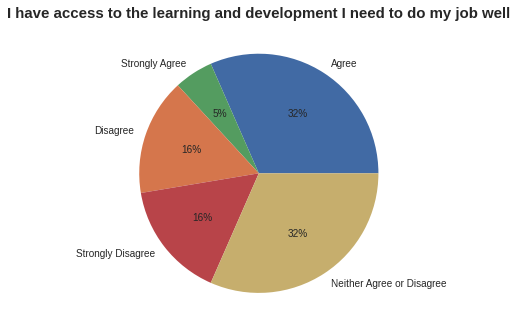

In [21]:
a = df.loc[df['learn'] == 'A'].count()[0]
sa = df.loc[df['learn'] == 'SA'].count()[0]
d = df.loc[df['learn'] == 'D'].count()[0]
sd = df.loc[df['learn'] == 'D'].count()[0]
n = df.loc[df['learn'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, sa, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('I have access to the learning and development I need to do my job well', size=15, fontweight='bold')

plt.show()

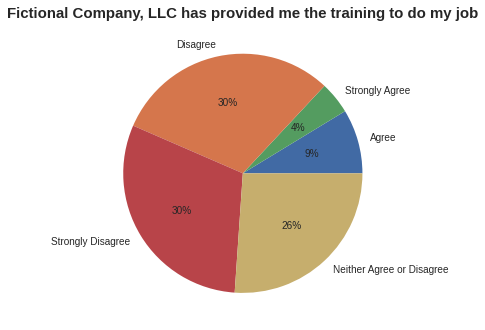

In [22]:
a = df.loc[df['train'] == 'A'].count()[0]
sa = df.loc[df['train'] == 'SA'].count()[0]
d = df.loc[df['train'] == 'D'].count()[0]
sd = df.loc[df['train'] == 'D'].count()[0]
n = df.loc[df['train'] == 'N'].count()[0]


labels = ['Agree', 'Strongly Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#549c60', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, sa, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('Fictional Company, LLC has provided me the training to do my job', size=15, fontweight='bold')

plt.show()

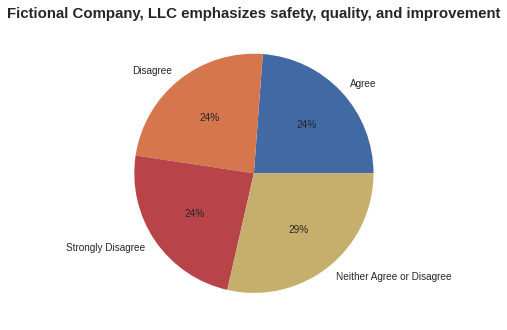

In [24]:
a = df.loc[df['safe'] == 'A'].count()[0]
d = df.loc[df['safe'] == 'D'].count()[0]
sd = df.loc[df['safe'] == 'D'].count()[0]
n = df.loc[df['safe'] == 'N'].count()[0]


labels = ['Agree', 'Disagree', 'Strongly Disagree', 'Neither Agree or Disagree']
colors = ['#416aa4', '#d5764c', '#b84449', '#c6ae6d']

plt.pie([a, d, sd, n], labels=labels, colors=colors, autopct='%.0f%%')

plt.title('Fictional Company, LLC emphasizes safety, quality, and improvement', size=15, fontweight='bold')

plt.show()